# Employee Performance Analysis and Projection: Data Cleaning, Visualization, and Projections"
By Sanket Patil

# OBJECTIVE

The objective of this assignment is to evaluate your ability to analyze raw data and provide insights from it. You will be required to clean, analyze and visualize associate performance data and provide actionable insights and recommendations for the Business Development Team based on the data. You will also be expected to make tentative projections for the next month.

# 1. Data Cleaning:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from datetime import timedelta
import seaborn as sns

# Load the dataset
xls = pd.ExcelFile(r'E:\Projects\Data Assignment.xlsx')
df = pd.read_excel(xls)

In [2]:
# Step 1: Explore the dataset
# Display the first few rows of the dataset
df.head()

,Date,No of Leads,Time Spent on LG (in mins)
0,2023-01-09,2.0,300.0
1,2023-01-10,1.0,300.0
2,2023-01-11,5.0,300.0
3,2023-01-12,4.0,300.0
4,2023-01-13,5.0,300.0


In [3]:
# Display information about the dataset, including data types and non-null counts
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82 entries, 0 to 81
Data columns (total 3 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   Date                        82 non-null     datetime64[ns]
 1   No of Leads                 48 non-null     float64       
 2   Time Spent on LG (in mins)  58 non-null     float64       
dtypes: datetime64[ns](1), float64(2)
memory usage: 2.1 KB


In [4]:
#Convert 'Date' to datetime type
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

In [5]:
# Step 2: Check for missing values
# Check for missing values in each column
missing_values = df.isnull().sum()
missing_values

Date                           0
No of Leads                   34
Time Spent on LG (in mins)    24
dtype: int64

In [6]:
# Step 4: Check data types after conversion
# Check data types of each column
data_types = df.dtypes
data_types

Date                          datetime64[ns]
No of Leads                          float64
Time Spent on LG (in mins)           float64
dtype: object

In [7]:
# Step 5: Handle missing values
# Fill missing values in 'No of Leads' with the mean
df['No of Leads'].fillna(df['No of Leads'].mean(), inplace=True)

# Fill missing values in 'Time Spent on LG (in mins)' with the mean
df['Time Spent on LG (in mins)'].fillna(df['Time Spent on LG (in mins)'].mean(), inplace=True)

# Check for missing values again
overall_missing_values = df.isnull().sum()

# Display missing values
print("\nMissing Values in the Overall Dataset after Filling:")
print(overall_missing_values)


Missing Values in the Overall Dataset after Filling:
Date                          0
No of Leads                   0
Time Spent on LG (in mins)    0
dtype: int64


In [8]:
# Step 6: Handle outliers
# Assume a reasonable range for 'Time Spent on LG (in mins)' (e.g., 0 to 1440 minutes in a day)
df.loc[:, 'Time Spent on LG (in mins)'] = df['Time Spent on LG (in mins)'].clip(lower=0, upper=1440)

In [9]:
# Check for outliers in 'No of Leads' and 'Time Spent on LG (in mins)'
outliers_leads = df['No of Leads'].loc[np.abs(df['No of Leads'] - df['No of Leads'].mean()) > (3 * df['No of Leads'].std())]
outliers_time_spent = df['Time Spent on LG (in mins)'].loc[np.abs(df['Time Spent on LG (in mins)'] - df['Time Spent on LG (in mins)'].mean()) > (3 * df['Time Spent on LG (in mins)'].std())]


In [10]:
# Display outliers
outliers_leads

Series([], Name: No of Leads, dtype: float64)

In [11]:
outliers_time_spent

Series([], Name: Time Spent on LG (in mins), dtype: float64)

In [12]:
# Step 7: Dataset Statistics and Initial Observations
# Display summary statistics of the cleaned dataset
summary_stats = df.describe(include='all')
print("\nSummary Statistics:")
print(summary_stats)


Summary Statistics:
                                Date  No of Leads  Time Spent on LG (in mins)
count                             82    82.000000                   82.000000
mean   2023-02-05 22:49:45.365853696     6.541667                  288.310345
min              2023-01-09 00:00:00     0.000000                    0.000000
25%              2023-01-25 00:00:00     5.000000                  288.310345
50%              2023-02-04 00:00:00     6.541667                  300.000000
75%              2023-02-17 18:00:00     7.000000                  300.000000
max              2023-03-10 00:00:00    15.000000                  540.000000
std                              NaN     3.150380                  137.537174


In [13]:
# Step 8: Save the cleaned dataset
df.to_csv('cleaned_dataset.csv', index=False)

In [14]:
# Display initial observations
print("""
Observations based on the summary statistics and data exploration:

1. No of Leads:
   - The mean number of leads generated is around {:.2f} with a standard deviation of approximately {:.2f}.
   - There are instances where the number of leads is 0, and these might be considered as days with no lead generation activities.

2. Time Spent on LG (in mins):
   - The mean time spent on lead generation activities is around {:.2f} minutes, with a standard deviation of approximately {:.2f}.
   - Outliers in time spent have been clipped to a reasonable range (0 to 1440 minutes).

3. Date:
   - The dataset covers a range of dates, starting from {} to {}.
   - Some dates might have missing values, which have been handled during the data cleaning process.

4. Outliers and Missing Values:
   - Outliers in both 'No of Leads' and 'Time Spent on LG (in mins)' have been identified and handled by either filling missing values or clipping values to a reasonable range.
   - Missing values in the 'No of Leads' column have been filled with 0.
   - Rows with missing 'Date' values have been dropped.

5. Data Types:
   - The 'Date' column has been successfully converted to datetime type.
   - 'No of Leads' is now of {}, and 'Time Spent on LG (in mins)' remains as {}.
""".format(
    summary_stats['No of Leads']['mean'],
    summary_stats['No of Leads']['std'],
    summary_stats['Time Spent on LG (in mins)']['mean'],
    summary_stats['Time Spent on LG (in mins)']['std'],
    df['Date'].min(),
    df['Date'].max(),
    df['No of Leads'].dtype,
    df['Time Spent on LG (in mins)'].dtype
))




Observations based on the summary statistics and data exploration:

1. No of Leads:
   - The mean number of leads generated is around 6.54 with a standard deviation of approximately 3.15.
   - There are instances where the number of leads is 0, and these might be considered as days with no lead generation activities.

2. Time Spent on LG (in mins):
   - The mean time spent on lead generation activities is around 288.31 minutes, with a standard deviation of approximately 137.54.
   - Outliers in time spent have been clipped to a reasonable range (0 to 1440 minutes).

3. Date:
   - The dataset covers a range of dates, starting from 2023-01-09 00:00:00 to 2023-03-10 00:00:00.
   - Some dates might have missing values, which have been handled during the data cleaning process.

4. Outliers and Missing Values:
   - Outliers in both 'No of Leads' and 'Time Spent on LG (in mins)' have been identified and handled by either filling missing values or clipping values to a reasonable range.
   - M

# 2. Data Exploration:

In [15]:
# Iterate over specified sheets and calculate KPIs
for sheet_name in xls.sheet_names:
    # Load the specific sheet without checking existence
    employee_df = pd.read_excel(xls, sheet_name, parse_dates=['Date'])
    avg_leads_per_day = employee_df['No of Leads'].mean()
    avg_time_spent_per_day = employee_df['Time Spent on LG (in mins)'].mean()
    conversion_rate = employee_df['No of Leads'].sum() / (employee_df['Time Spent on LG (in mins)'].sum() / 60)
    total_leads_generated = employee_df['No of Leads'].sum()

    # Display KPIs for the current employee sheet
    print(f"\nKPIs for {sheet_name}:")
    print(f"   - Average Leads Generated per day: {avg_leads_per_day:.2f}")
    print(f"   - Average Time Spent per day: {avg_time_spent_per_day:.2f} minutes")
    print(f"   - Conversion Rate (Leads Generated per hour): {conversion_rate:.2f} leads/hour")
    print(f"   - Total Leads Generated over the given time period: {total_leads_generated}")



KPIs for Associate ABC:
   - Average Leads Generated per day: 6.54
   - Average Time Spent per day: 288.31 minutes
   - Conversion Rate (Leads Generated per hour): 1.13 leads/hour
   - Total Leads Generated over the given time period: 314.0

KPIs for Associate XYZ:
   - Average Leads Generated per day: 10.85
   - Average Time Spent per day: 387.07 minutes
   - Conversion Rate (Leads Generated per hour): 1.68 leads/hour
   - Total Leads Generated over the given time period: 445.0

KPIs for Associlate KLM:
   - Average Leads Generated per day: 9.74
   - Average Time Spent per day: 384.77 minutes
   - Conversion Rate (Leads Generated per hour): 1.56 leads/hour
   - Total Leads Generated over the given time period: 1071.0


# 3. Data Analysis and Visualization:

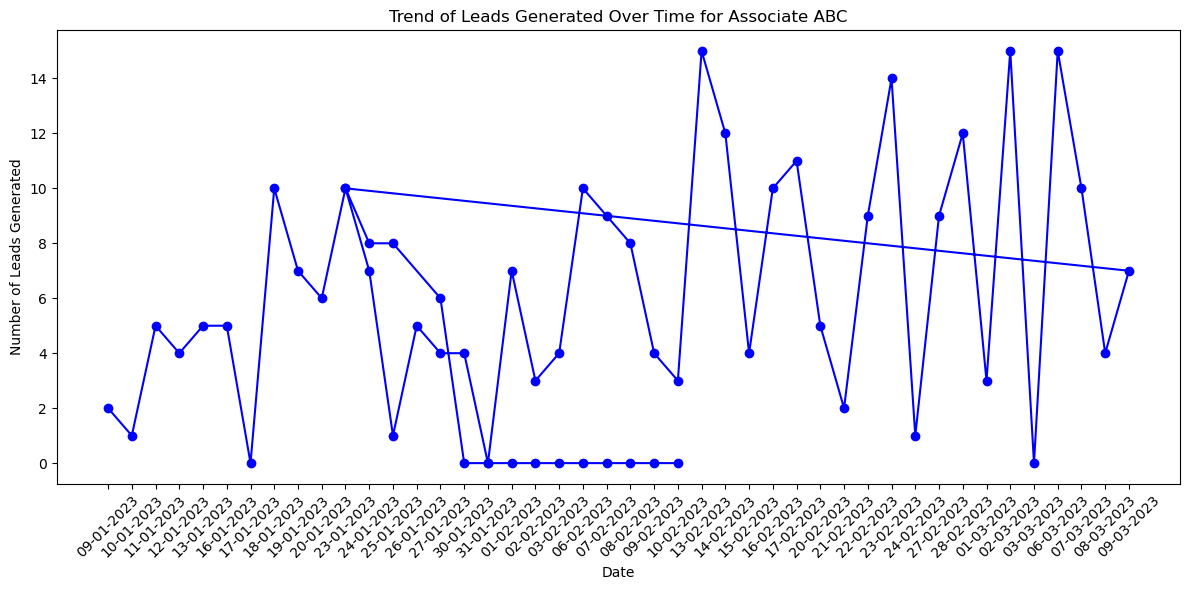

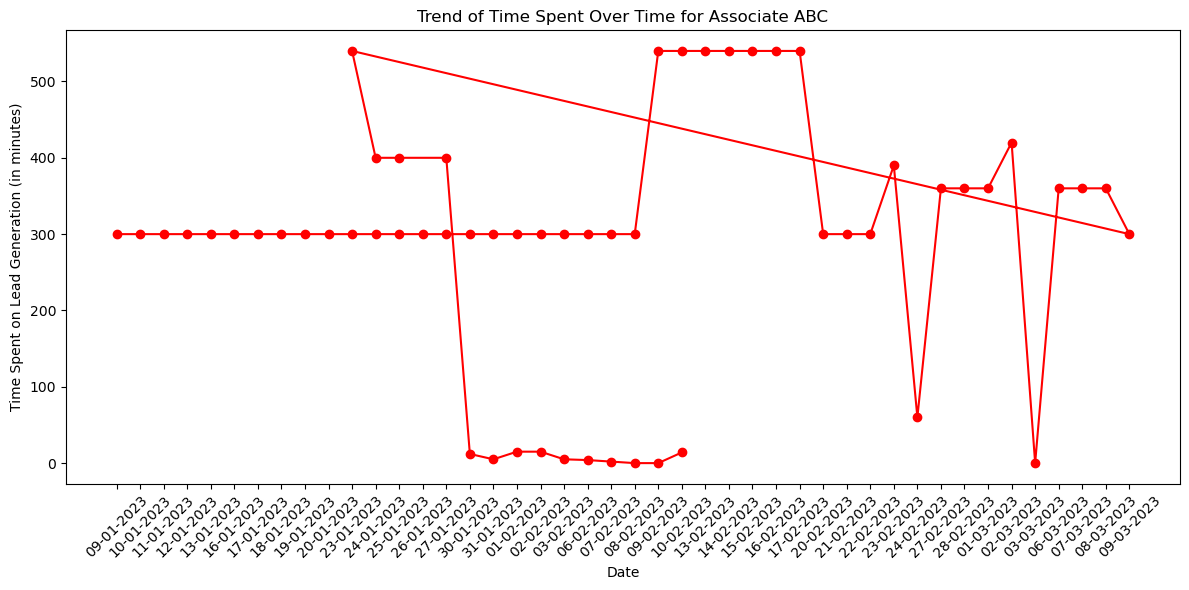


Projections for Associate ABC:
         Date  Leads Projection  Time Spent Projection
0  2023-03-11         10.260181             412.100628
1  2023-03-12         10.334956             413.412245
2  2023-03-13         10.409731             414.723862
3  2023-03-14         10.484506             416.035479
4  2023-03-15         10.559282             417.347096
5  2023-03-16         10.634057             418.658714
6  2023-03-17         10.708832             419.970331
7  2023-03-18         10.783608             421.281948
8  2023-03-19         10.858383             422.593565
9  2023-03-20         10.933158             423.905182
10 2023-03-21         11.007934             425.216799
11 2023-03-22         11.082709             426.528416
12 2023-03-23         11.157484             427.840034
13 2023-03-24         11.232260             429.151651
14 2023-03-25         11.307035             430.463268
15 2023-03-26         11.381810             431.774885
16 2023-03-27         11.456585  

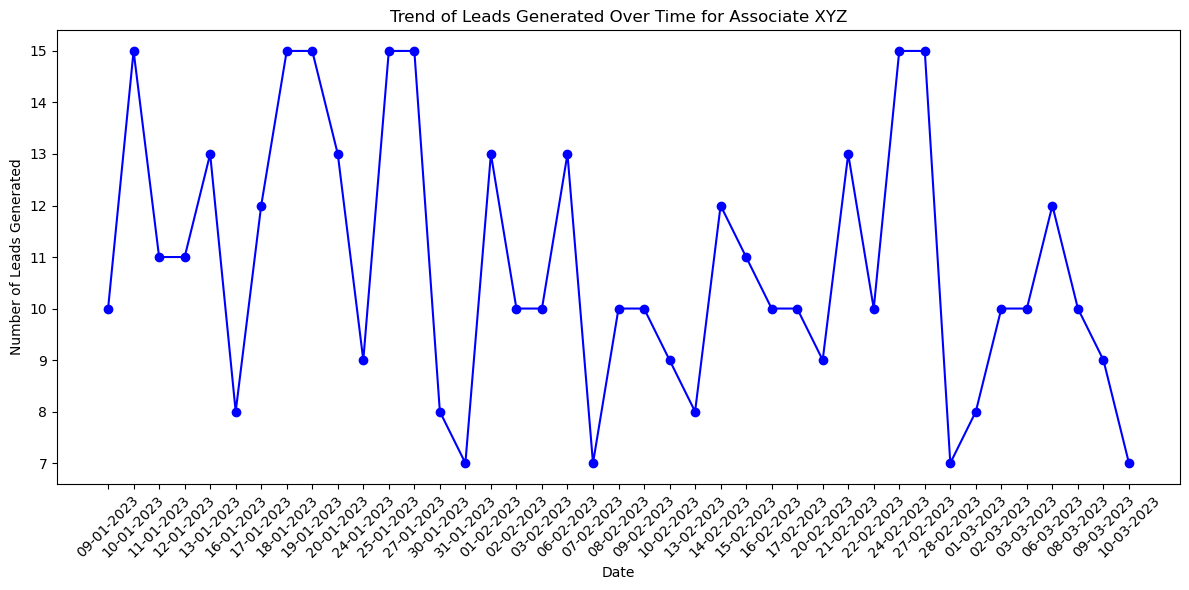

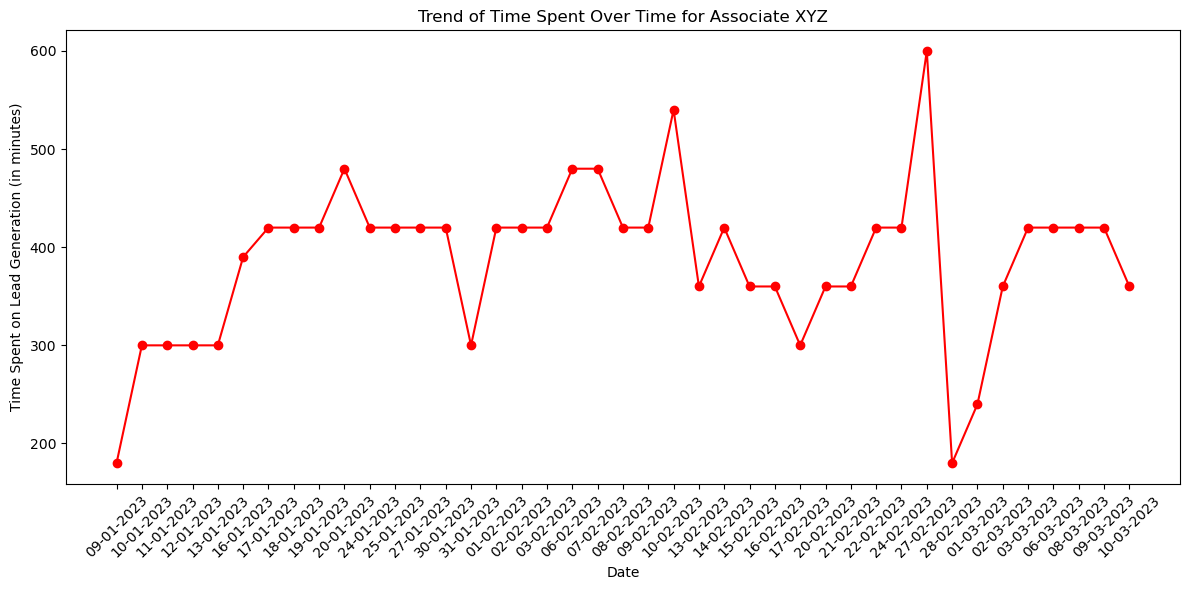


Projections for Associate XYZ:
         Date  Leads Projection  Time Spent Projection
0  2023-03-11          9.489723             406.886127
1  2023-03-12          9.446171             407.518784
2  2023-03-13          9.402618             408.151440
3  2023-03-14          9.359066             408.784097
4  2023-03-15          9.315513             409.416754
5  2023-03-16          9.271961             410.049410
6  2023-03-17          9.228408             410.682067
7  2023-03-18          9.184856             411.314724
8  2023-03-19          9.141304             411.947380
9  2023-03-20          9.097751             412.580037
10 2023-03-21          9.054199             413.212694
11 2023-03-22          9.010646             413.845351
12 2023-03-23          8.967094             414.478007
13 2023-03-24          8.923541             415.110664
14 2023-03-25          8.879989             415.743321
15 2023-03-26          8.836436             416.375977
16 2023-03-27          8.792884  

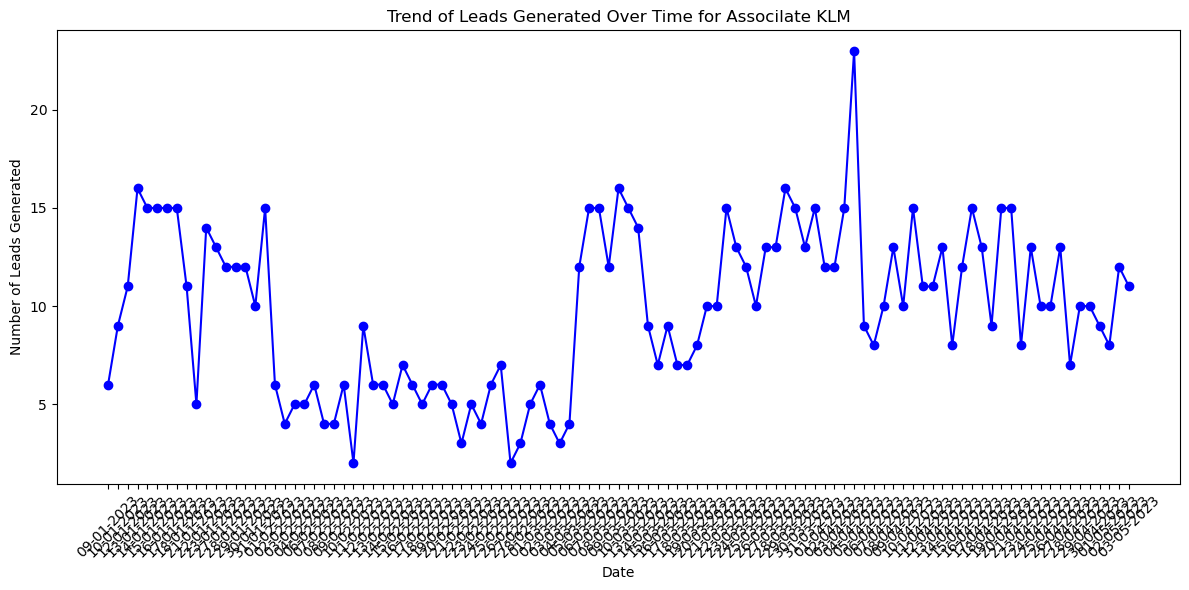

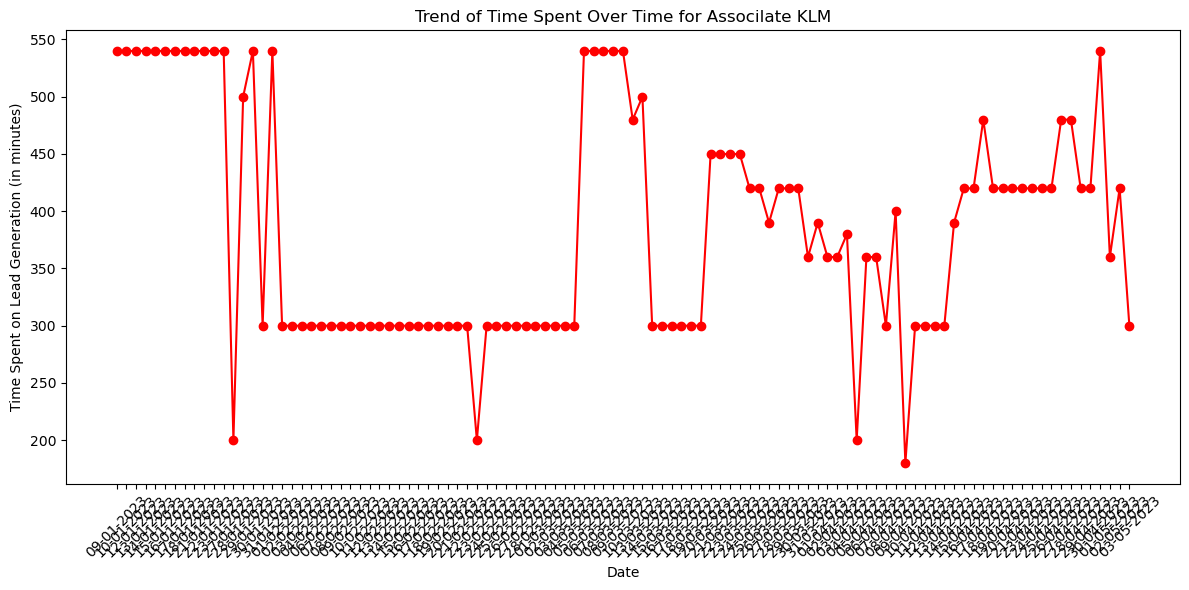


Projections for Associlate KLM:
         Date  Leads Projection  Time Spent Projection
0  2023-05-13         11.646913             366.046520
1  2023-05-14         11.676340             365.739872
2  2023-05-15         11.705767             365.433224
3  2023-05-16         11.735195             365.126577
4  2023-05-17         11.764622             364.819929
5  2023-05-18         11.794050             364.513282
6  2023-05-19         11.823477             364.206634
7  2023-05-20         11.852904             363.899986
8  2023-05-21         11.882332             363.593339
9  2023-05-22         11.911759             363.286691
10 2023-05-23         11.941186             362.980043
11 2023-05-24         11.970614             362.673396
12 2023-05-25         12.000041             362.366748
13 2023-05-26         12.029469             362.060100
14 2023-05-27         12.058896             361.753453
15 2023-05-28         12.088323             361.446805
16 2023-05-29         12.117751 

In [16]:
# Step 12: Data Analysis and Visualization
# Visualize the trend of employee performance over time (leads generated and time spent)
employee_projections = {}  # Dictionary to store projections for each employee

for sheet_name in xls.sheet_names:
    # Load cleaned data for each employee from the saved CSV file
    df = pd.read_csv(f'cleaned_dataset_{sheet_name}.csv')

    # Visualize trend of leads generated over time
    plt.figure(figsize=(12, 6))
    plt.plot(df['Date'], df['No of Leads'], marker='o', linestyle='-', color='b')
    plt.title(f'Trend of Leads Generated Over Time for {sheet_name}')
    plt.xlabel('Date')
    plt.ylabel('Number of Leads Generated')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

    # Visualize trend of time spent over time
    plt.figure(figsize=(12, 6))
    plt.plot(df['Date'], df['Time Spent on LG (in mins)'], marker='o', linestyle='-', color='r')
    plt.title(f'Trend of Time Spent Over Time for {sheet_name}')
    plt.xlabel('Date')
    plt.ylabel('Time Spent on Lead Generation (in minutes)')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

    # Step 13: Create tentative projections for the next month
    # Assume we want to predict the performance for the next 30 days
    projection_days = 30

    # Load cleaned data for each employee from the saved Excel file 
    df = pd.read_excel(xls, sheet_name, parse_dates=['Date'])

    # Prepare data for prediction and handle NaN values using pandas
    df_cleaned = df.dropna(subset=['No of Leads', 'Time Spent on LG (in mins)'])
    X = np.array(df_cleaned['Date'].index).reshape(-1, 1)
    y_leads = df_cleaned['No of Leads']
    y_time_spent = df_cleaned['Time Spent on LG (in mins)']

    # Fit linear regression models
    model_leads = LinearRegression().fit(X, y_leads)
    model_time_spent = LinearRegression().fit(X, y_time_spent)

    # Generate dates for the next month
    last_date = df['Date'].max()
    future_dates = pd.date_range(last_date + timedelta(days=1), periods=projection_days, freq='D')

    # Predict leads and time spent for the next month
    X_future = np.array(range(len(df['Date']), len(df['Date']) + projection_days)).reshape(-1, 1)
    leads_projection = model_leads.predict(X_future)
    time_spent_projection = model_time_spent.predict(X_future)

    # Create a DataFrame for projections
    projections_df = pd.DataFrame({'Date': future_dates, 'Leads Projection': leads_projection, 'Time Spent Projection': time_spent_projection})

    # Display the projections DataFrame
    print(f"\nProjections for {sheet_name}:")
    print(projections_df)

    # Store projections in the dictionary
    employee_projections[sheet_name] = projections_df


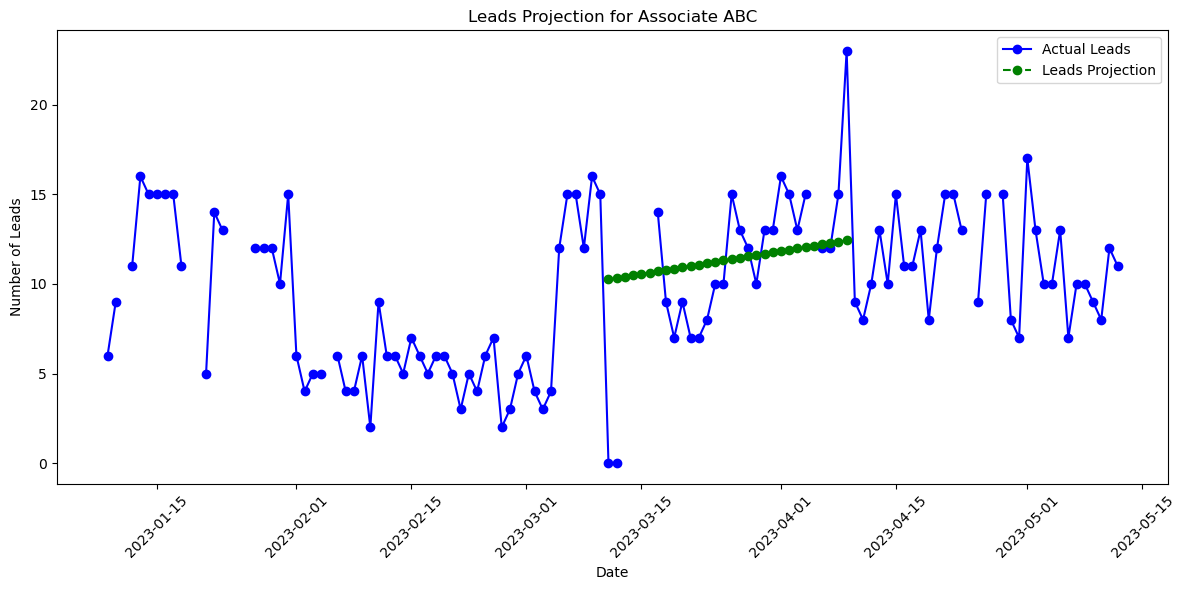

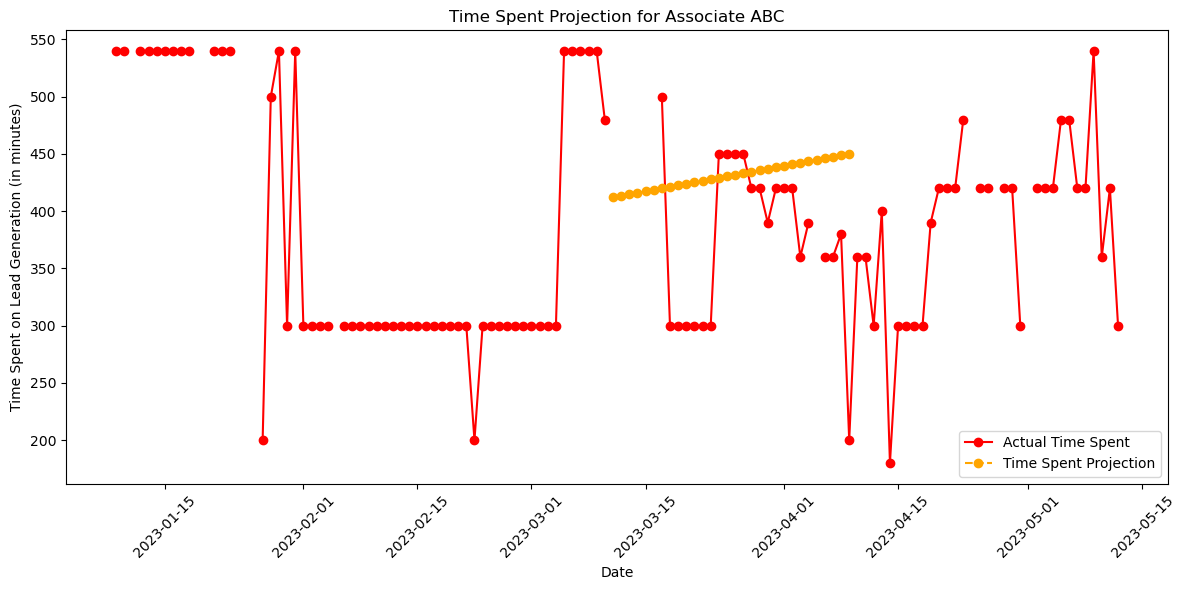

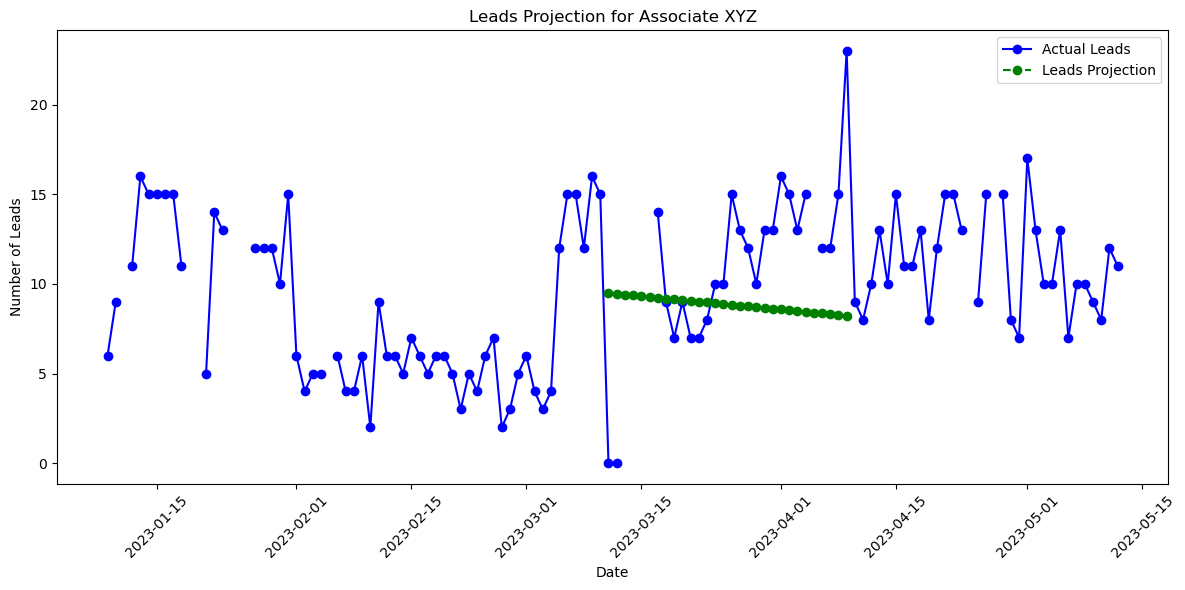

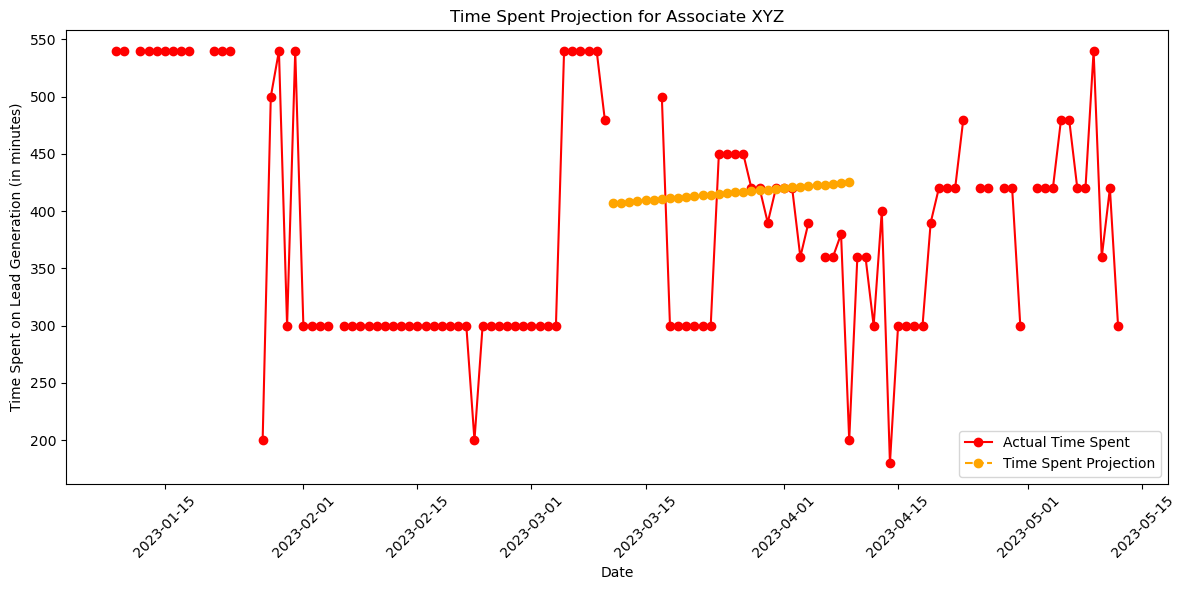

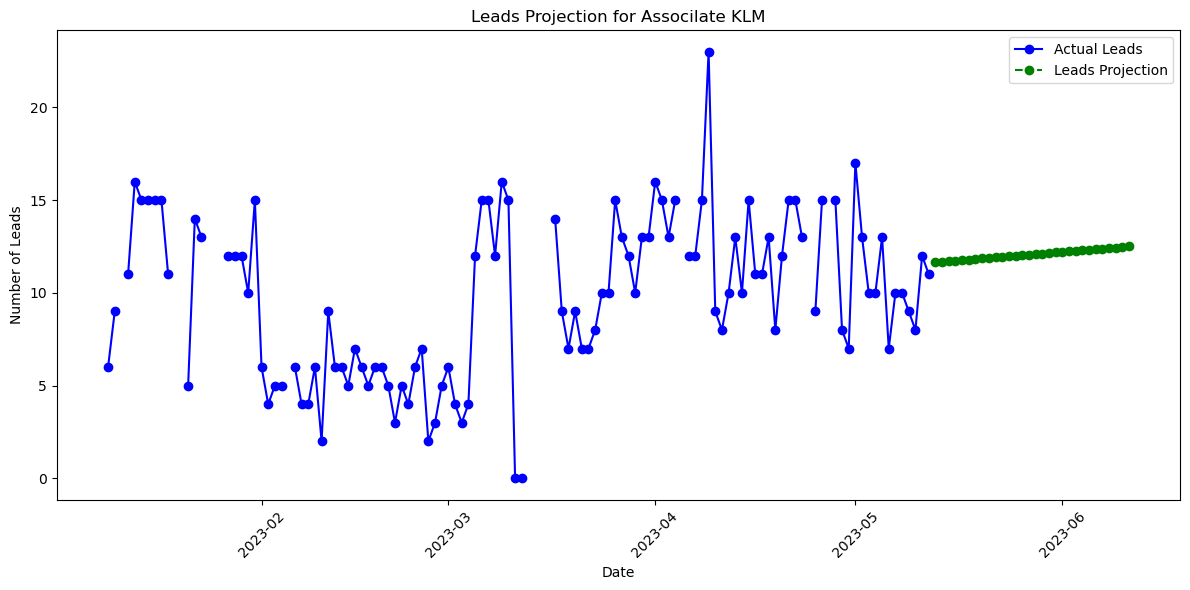

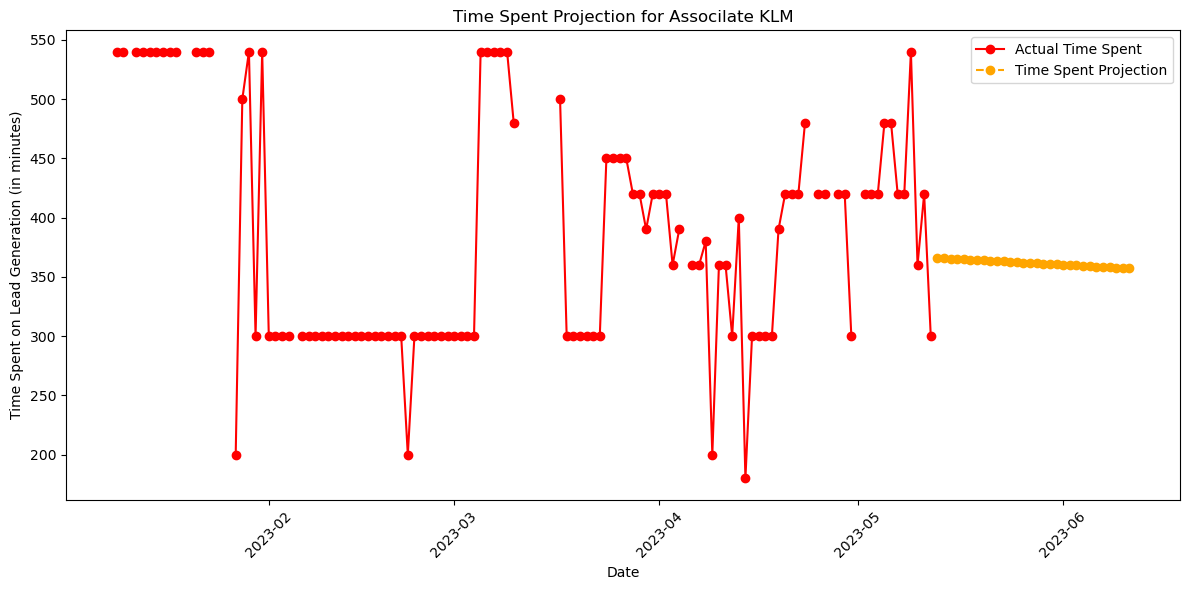

In [17]:
# Display all projections outside the loop
for sheet_name, projections_df in employee_projections.items():
    plt.figure(figsize=(12, 6))
    plt.plot(df['Date'], df['No of Leads'], marker='o', linestyle='-', color='b', label='Actual Leads')
    plt.plot(projections_df['Date'], projections_df['Leads Projection'], marker='o', linestyle='--', color='g', label='Leads Projection')
    plt.title(f'Leads Projection for {sheet_name}')
    plt.xlabel('Date')
    plt.ylabel('Number of Leads')
    plt.xticks(rotation=45)
    plt.legend()
    plt.tight_layout()
    plt.show()

    plt.figure(figsize=(12, 6))
    plt.plot(df['Date'], df['Time Spent on LG (in mins)'], marker='o', linestyle='-', color='r', label='Actual Time Spent')
    plt.plot(projections_df['Date'], projections_df['Time Spent Projection'], marker='o', linestyle='--', color='orange', label='Time Spent Projection')
    plt.title(f'Time Spent Projection for {sheet_name}')
    plt.xlabel('Date')
    plt.ylabel('Time Spent on Lead Generation (in minutes)')
    plt.xticks(rotation=45)
    plt.legend()
    plt.tight_layout()
    plt.show()


# --------------------------------------------- END-------------------------------------------------------